## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [41]:
your_name = "Thuy Vy Tran"
your_student_id = "47686456"

In [42]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [43]:
# Load the CSV file
df = pd.read_csv('/Users/vytranthuy/Documents/Macquarie/2024 - Session 2/COMP2200/car_sell.csv', index_col = 0)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [44]:
# Display the length of the DataFrame and count of null values BEFORE removing missing data
initial_length = len(df)
initial_null_counts = df.isnull().sum()

print("Initial DataFrame length:", initial_length)
print("Initial null value counts:\n", initial_null_counts)

Initial DataFrame length: 4340
Initial null value counts:
 name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64


In [45]:
# Remove records where 'year' is missing or 'fuel' is 'none'
df_clean = df.dropna(subset=['year'])
df_clean = df_clean[df_clean['fuel'] != 'none']

In [46]:
# Display the length of the DataFrame and count of null values AFTER removing missing data
clean_length = len(df_clean)
clean_null_counts = df_clean.isnull().sum()

print("Cleaned DataFrame length:", clean_length)
print("Cleaned null value counts:\n", clean_null_counts)

Cleaned DataFrame length: 3886
Cleaned null value counts:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [47]:
# Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner

total_unique_name = df_clean['name'].nunique()
total_unique_seller_type = df_clean['seller_type'].nunique()
total_unique_transmission = df_clean['transmission'].nunique()
totla_unique_owner = df_clean['owner'].nunique()

print(f"Total unique names: {total_unique_name}")
print(f"Total unique seller types: {total_unique_seller_type}")
print(f"Total unique transmissions: {total_unique_transmission}")
print(f"Total unique owners: {totla_unique_owner}")

Total unique names: 1402
Total unique seller types: 3
Total unique transmissions: 2
Total unique owners: 5


In [48]:
# Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven

km_driven = df_clean['km_driven'].agg(['mean', 'std', 'min', 'max'])
print(km_driven)

mean     66313.279207
std      46679.603916
min          1.000000
max     806599.000000
Name: km_driven, dtype: float64


In [49]:
# Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type

price_by_seller_type = df_clean.groupby('seller_type')['selling_price'].agg(['mean', 'std', 'min', 'max'])

print("\nDescriptive statistics for selling_price grouped by seller_type:")
print(price_by_seller_type)


Descriptive statistics for selling_price grouped by seller_type:
                           mean            std     min      max
seller_type                                                    
Dealer            702093.314961  813597.811832   22000  8900000
Individual        421169.410265  420273.684129   20000  4800000
Trustmark Dealer  935797.872340  655724.299195  315000  2600000


In [50]:
# Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type

df_clean['year_diff'] = 2024 - df_clean['year']  # Assuming the current year is 2024
year_diff_by_owner = df_clean.groupby('owner')['year_diff'].agg(['mean', 'std', 'min', 'max'])

print("\nDescriptive statistics for year difference (years sold) by owner type:")
print(year_diff_by_owner)


Descriptive statistics for year difference (years sold) by owner type:
                           mean       std  min   max
owner                                               
First Owner            9.546209  3.555597  4.0  28.0
Fourth & Above Owner  16.761194  5.248635  4.0  32.0
Second Owner          13.023000  3.840993  5.0  29.0
Test Drive Car         4.357143  0.633324  4.0   6.0
Third Owner           14.586081  3.920266  5.0  27.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [51]:
import seaborn as sns
sns.set(style="whitegrid")

/Users/vytranthuy/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


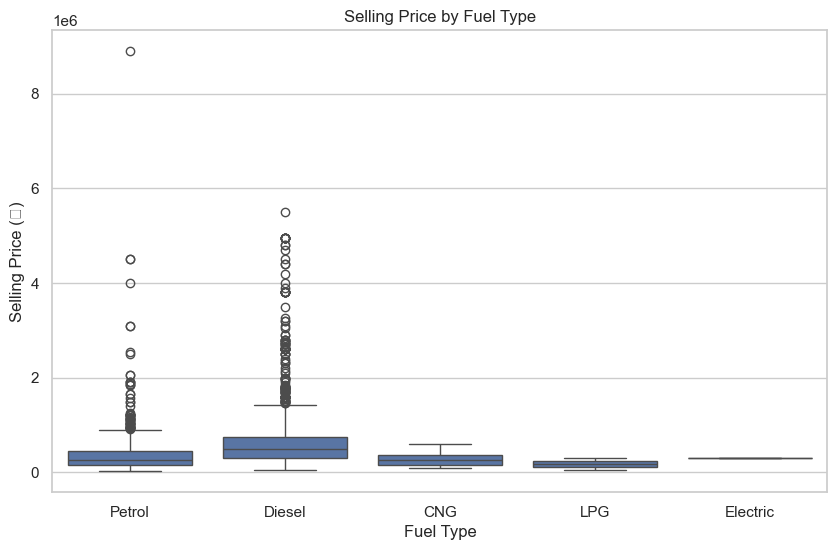

This plot shows Diesel cars often command a higher price than Petrol cars.
This is because diesel engines are usually more fuel-efficient and durable, which can make them more desirable, especially in regions where diesel is cheaper.


In [52]:
# 1. Boxplot for fuel vs selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_clean)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (₹)')
plt.show()

summarize1 = """This plot shows Diesel cars often command a higher price than Petrol cars.
This is because diesel engines are usually more fuel-efficient and durable, which can make them more desirable, especially in regions where diesel is cheaper."""
print(summarize1)

/Users/vytranthuy/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


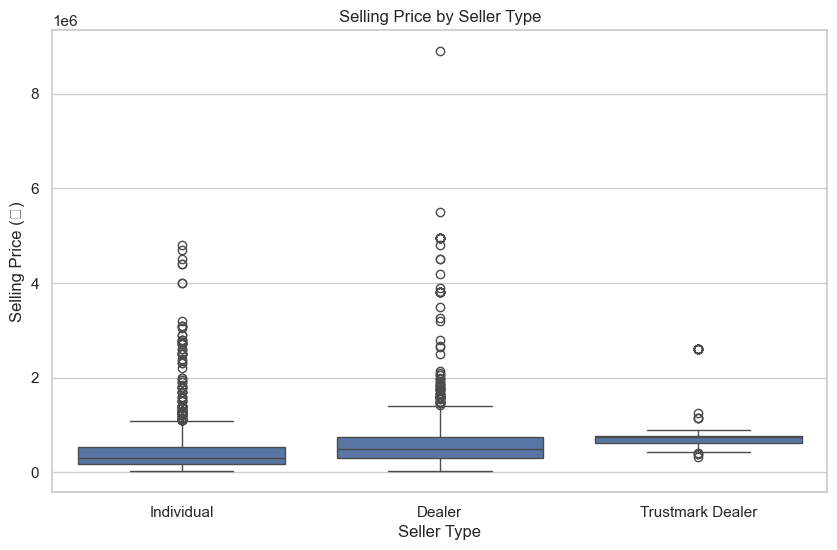

This plot shows Cars sold by Dealers tend to have higher prices compared to those sold by Individuals.
This is because dealers might add a premium for warranties, certified checks, and other services, which can lead to higher selling prices.


In [53]:
# 2. Boxplot for seller_type vs selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df_clean)
plt.title('Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (₹)')
plt.show()

summarize2 = """This plot shows Cars sold by Dealers tend to have higher prices compared to those sold by Individuals.
This is because dealers might add a premium for warranties, certified checks, and other services, which can lead to higher selling prices."""
print(summarize2)

/Users/vytranthuy/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


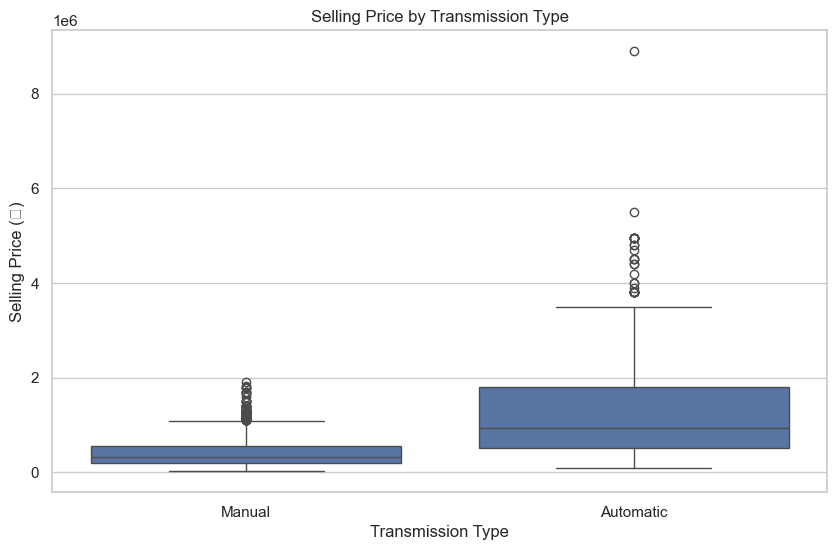

This plot shows Automatic transmission cars often have a higher selling price than manual ones.
This is because automatic cars are often seen as more convenient, which can make them more attractive to buyers despite usually having higher initial costs.


In [54]:
# 3. Boxplot for transmission vs selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df_clean)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price (₹)')
plt.show()

summarize3 = """This plot shows Automatic transmission cars often have a higher selling price than manual ones.
This is because automatic cars are often seen as more convenient, which can make them more attractive to buyers despite usually having higher initial costs."""
print(summarize3) 

/Users/vytranthuy/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


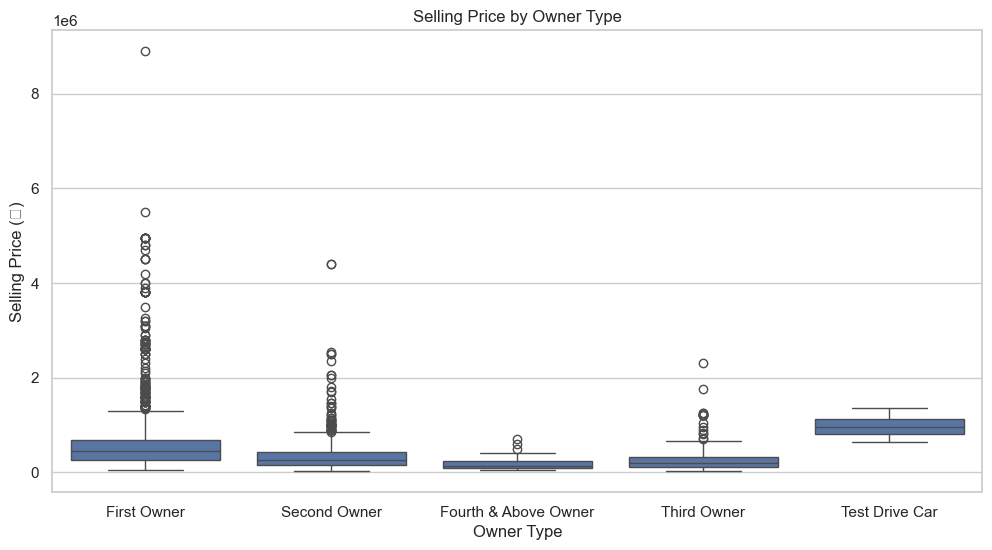

First Owner cars typically have a higher selling price compared to Second and Third Owner cars.
This is likely because First Owner cars are perceived as better maintained and have less wear and tear, making them more valuable.


In [55]:
# 4. Boxplot for owner vs selling_price
plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data=df_clean)
plt.title('Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price (₹)')
plt.show()

summarize4 = """First Owner cars typically have a higher selling price compared to Second and Third Owner cars.
This is likely because First Owner cars are perceived as better maintained and have less wear and tear, making them more valuable."""
print(summarize4)

/Users/vytranthuy/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


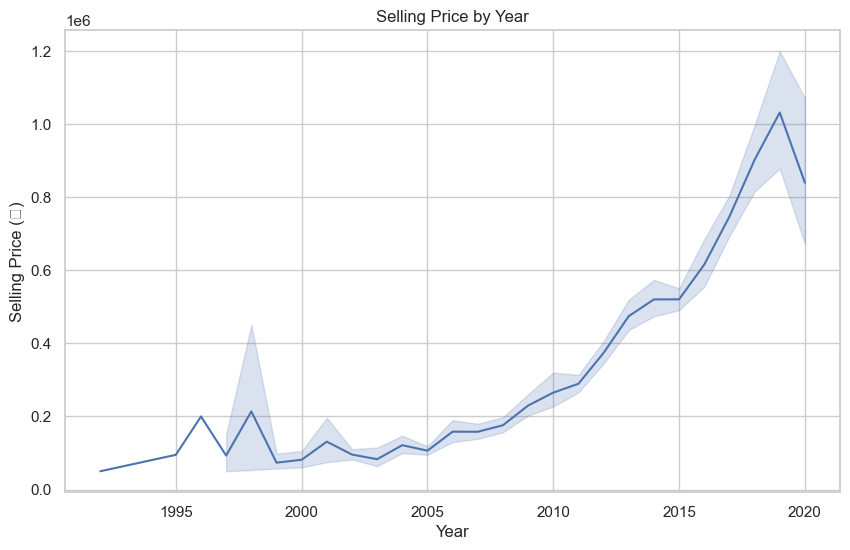

Newer cars generally sell for higher prices.
This is expected as newer cars typically have less mileage, more up-to-date features, and are still under warranty.


In [56]:
# 5. Scatter plot for year vs selling_price
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='selling_price', data=df)
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.show()

summarize5 = """Newer cars generally sell for higher prices.
This is expected as newer cars typically have less mileage, more up-to-date features, and are still under warranty."""
print(summarize5)

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [57]:
owner = ['First Owner', 'Second Owner', 'Third Owner']
fuel = ['Diesel', 'Petrol']
seller_type = ['Dealer', 'Individual']

In [58]:
# Remove outliers
df_clean = df_clean[
    df_clean['owner'].isin(owner) &
    df_clean['fuel'].isin(fuel) &
    df_clean['seller_type'].isin(seller_type)
]

# Print the length of the data
print("The length of the data:", len(df_clean))

The length of the data: 3657


owner = ['First Owner', 'Second Owner', 'Third Owner']
fuel = ['Diesel', 'Petrol']
seller_type = ['Dealer', 'Individual']


new_data = df_cleaned[
    df_cleaned['owner'].isin(owner) &
    df_cleaned['fuel'].isin(fuel) &
    df_cleaned['seller_type'].isin(seller_type)
]

len_new_data = len(new_data)
print(len_new_data)
new_data['owner'].value_counts()
